In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import scipy.stats as stats

In [7]:
df = pd.read_csv('wilcoxon_03_21_22_raw.csv')

df

,feature,lobe,artery_or_vein,SCALE,total__count,total__mean,total__std,total__min,total__25%,total__50%,...,pah__50%,pah__75%,pah__max,test_notes,t-test_control_epah,wilcoxon_control_epah,t-test_control_pah,wilcoxon_control_pah,t-test_epah_pah,wilcoxon_epah_pah
0,FDs__Fractal_Dimension,whole,NaN,1.0,91,2.359990,0.050217,2.229327,2.330151,2.360114,...,2.357424,2.388985,2.450582,NaN,0.210051,0.155923,0.068757,0.049919,0.906241,0.446211
1,FDs_20SizeBy1__Fractal_Dimension,whole,NaN,1.0,91,2.385967,0.044026,2.262885,2.356429,2.386756,...,2.381006,2.413977,2.467179,NaN,0.423233,0.185365,0.056453,0.072287,0.557270,0.319842
2,FDs_DNN_SCALE__Fractal_Dimension,whole,NaN,1.0,91,2.202167,0.056342,2.010047,2.173603,2.205977,...,2.187664,2.219321,2.272649,NaN,0.018635,0.037654,0.000077,0.000142,0.945431,0.290691
3,FDs_DNN_SCALE_20SizeBy1__Fractal_Dimension,whole,NaN,1.0,91,2.055265,0.055574,1.904578,2.021928,2.059596,...,2.031395,2.072822,2.131110,NaN,0.006352,0.007087,0.000004,0.000005,0.476413,0.276598
4,FDs_FACTOR_0_5_SCALE__Fractal_Dimension,whole,NaN,0.5,91,2.164747,0.050967,2.015833,2.130855,2.170347,...,2.159119,2.184188,2.233177,NaN,0.079929,0.111119,0.003239,0.003935,0.941328,0.397402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,FDs_FACTOR_1_2_SCALE_ArtVein__Fractal_Dimension,whole,vein,1.2,91,2.178846,0.065176,1.987562,2.135692,2.184404,...,2.149198,2.196617,2.272190,NaN,0.018179,0.026109,0.000005,0.000007,0.369887,0.156462
77,FDs_FACTOR_1_3_SCALE_ArtVein__Fractal_Dimension,whole,vein,1.3,91,2.206393,0.065272,2.018744,2.162088,2.210358,...,2.178244,2.223213,2.302192,NaN,0.019029,0.024731,0.000005,0.000009,0.369456,0.156462
78,FDs_FACTOR_1_4_SCALE_ArtVein__Fractal_Dimension,whole,vein,1.4,91,2.230446,0.063711,2.047854,2.186204,2.233612,...,2.202504,2.246706,2.330132,NaN,0.027897,0.037654,0.000008,0.000013,0.335395,0.141967
79,FDs_FACTOR_1_5_SCALE_ArtVein__Fractal_Dimension,whole,vein,1.5,91,2.253280,0.062921,2.072550,2.209621,2.256840,...,2.225010,2.265807,2.355944,NaN,0.028962,0.037654,0.000017,0.000023,0.375688,0.146694


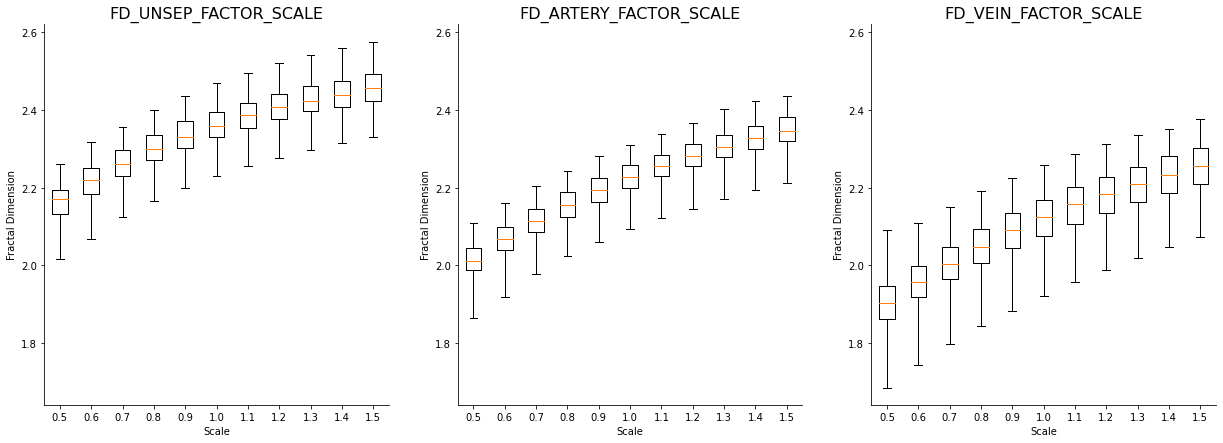

In [105]:
# Boxplots of Scales vs FD
scales = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

stats = []
for scale in scales:
    row = df[df['artery_or_vein'].isna() & df['feature'].str.contains(str(scale).replace('.', '_')) & ~df['feature'].str.contains('20SizeBy1')].iloc[0]
    stats.append({
        'label': str(scale),
        'med': row['total__50%'],
        'q1': row['total__25%'],
        'q3': row['total__75%'],
        'whislo': row['total__min'],
        'whishi': row['total__max'],
        'fliers': [],
    })

things_to_plot = [
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'blue',
    }
]

for thing_to_plot in things_to_plot:
    stats = []
    for i, scale in enumerate(scales):
        row = thing_to_plot['df'].iloc[i]
        stats.append({
            'label': str(scale),
            'med': row['total__50%'],
            'q1': row['total__25%'],
            'q3': row['total__75%'],
            'whislo': row['total__min'],
            'whishi': row['total__max'],
            'fliers': [],
        })

    axes[thing_to_plot['axes']].bxp(stats)
    axes[thing_to_plot['axes']].set_title(f'{thing_to_plot["label"]}', fontsize=16)
    axes[thing_to_plot['axes']].set_xlabel('Scale')
    axes[thing_to_plot['axes']].set_ylabel('Fractal Dimension')

    axes[thing_to_plot['axes']].tick_params(axis='y', reset=True, right=False)
    axes[thing_to_plot['axes']].spines['top'].set_visible(False)
    axes[thing_to_plot['axes']].spines['right'].set_visible(False)
    # axes.spines['bottom'].set_visible(False)
    # axes.spines['left'].set_visible(False)

plt.show()

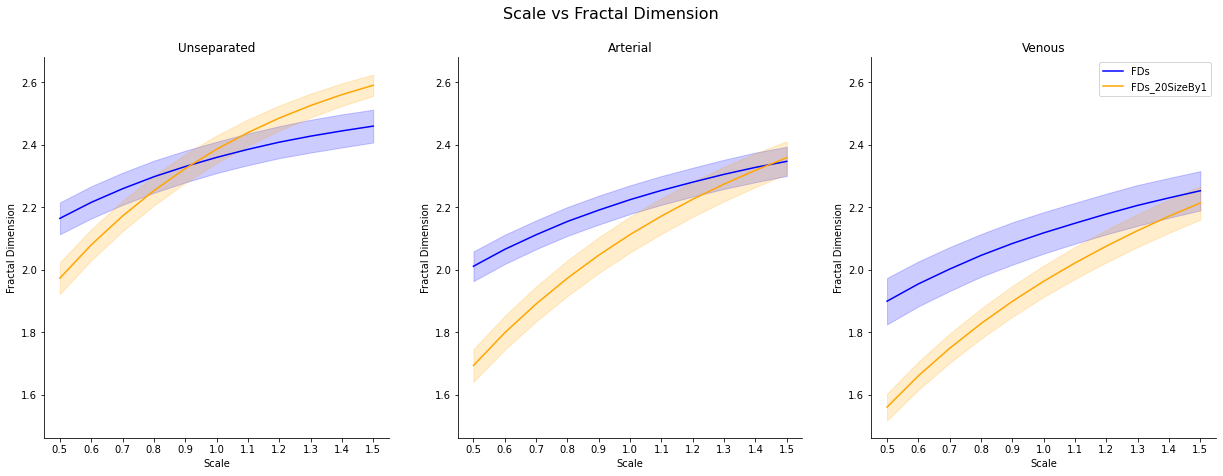

In [82]:
scales = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharey=True)

things_to_plot = [
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'blue',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'orange',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'orange',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'orange',
    },
]

titles = ['Unseparated', 'Arterial', 'Venous']

for i, thing_to_plot in enumerate(things_to_plot):
    df_to_plot = thing_to_plot['df']

    axes[thing_to_plot['axes']].plot(scales, df_to_plot['total__mean'],
             color=thing_to_plot['color'])
    axes[thing_to_plot['axes']].fill_between(scales, df_to_plot['total__mean'] - df_to_plot['total__std'],
                              df_to_plot['total__mean'] + df_to_plot['total__std'],
                     color=thing_to_plot['color'], alpha=0.2)

    axes[thing_to_plot['axes']].set_title('Scale vs Fractal Dimension')
    axes[thing_to_plot['axes']].set_xlabel('Scale')
    axes[thing_to_plot['axes']].set_ylabel('Fractal Dimension')

    axes[thing_to_plot['axes']].spines['top'].set_visible(False)
    axes[thing_to_plot['axes']].spines['right'].set_visible(False)
    # axes.spines['bottom'].set_visible(False)
    # axes.spines['left'].set_visible(False)

    axes[thing_to_plot['axes']].tick_params(axis='y', reset=True, right=False)
    axes[thing_to_plot['axes']].set_xticks(scales)
    axes[thing_to_plot['axes']].set_title(titles[int(i/2)])

fig.suptitle('Fractal Dimension vs Scale', fontsize=16)
plt.legend(['FDs', 'FDs_20SizeBy1'])
plt.show()

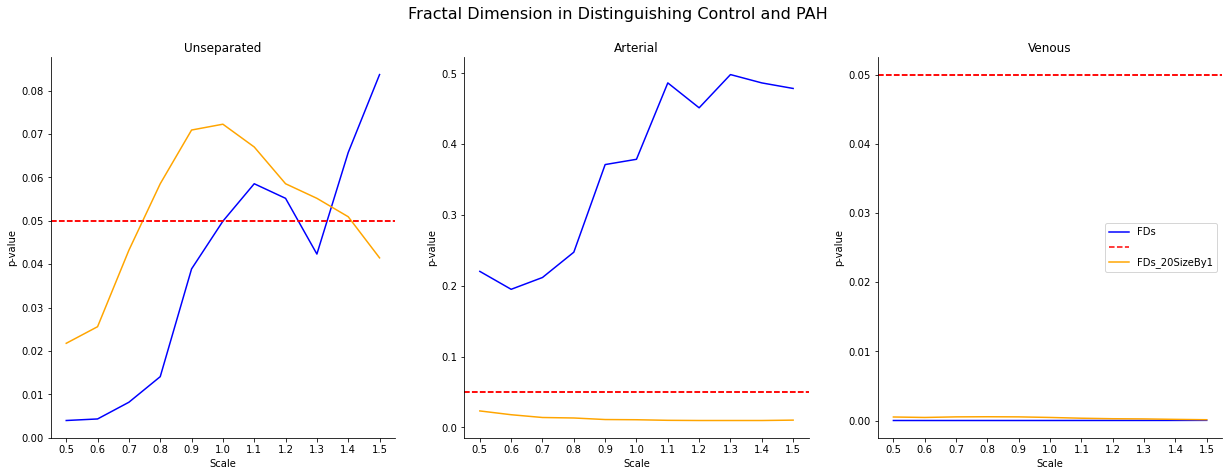

In [95]:
scales = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]

fig, axes = plt.subplots(1, 3, figsize=(21, 7))

things_to_plot = [
    {
        'label': 'FD_UNSEP_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'blue',
    },
    {
        'label': 'FD_UNSEP_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].isna() & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 0,
        'color': 'orange',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'blue',
    },
    {
        'label': 'FD_ARTERY_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].str.contains('artery') & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 1,
        'color': 'orange',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & ~df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'blue',
    },
    {
        'label': 'FD_VEIN_FACTOR_SCALE_20SizeBy1',
        'df': df[df['artery_or_vein'].str.contains('vein') & df['feature'].str.contains('FACTOR') & df['feature'].str.contains('20SizeBy1')],
        'axes': 2,
        'color': 'orange',
    },
]

titles = ['Unseparated', 'Arterial', 'Venous']

for i, thing_to_plot in enumerate(things_to_plot):
    df_to_plot = thing_to_plot['df']

    axes[thing_to_plot['axes']].plot(scales, df_to_plot['wilcoxon_control_pah'],
             color=thing_to_plot['color'])
#     axes[thing_to_plot['axes']].fill_between(scales, df_to_plot['total__mean'] - df_to_plot['total__std'],
#                               df_to_plot['total__mean'] + df_to_plot['total__std'],
#                      color=thing_to_plot['color'], alpha=0.2)
    
    axes[thing_to_plot['axes']].axhline(0.05, color='red', linestyle='--')
    
    axes[thing_to_plot['axes']].set_title('Scale vs Fractal Dimension')
    axes[thing_to_plot['axes']].set_xlabel('Scale')
    axes[thing_to_plot['axes']].set_ylabel('p-value')

    axes[thing_to_plot['axes']].spines['top'].set_visible(False)
    axes[thing_to_plot['axes']].spines['right'].set_visible(False)
    # axes.spines['bottom'].set_visible(False)
    # axes.spines['left'].set_visible(False)

    axes[thing_to_plot['axes']].tick_params(axis='y', reset=True, right=False)
    axes[thing_to_plot['axes']].set_xticks(scales)
    axes[thing_to_plot['axes']].set_title(titles[int(i/2)])

fig.suptitle('Fractal Dimension in Distinguishing Control and PAH', fontsize=16)
plt.legend(['FDs', '', 'FDs_20SizeBy1'])
plt.show()

In [ ]:
# The above figures demonstrate the effect of a scaling factor on the fractal dimensions of pulmonary vasculatures. Namely, fractal dimension was found to be directly proportional
# to the scaling factor when considering both small and large details. However, when calculating the fractal dimension using only smaller details via limiting
# box sizes (under 20 pixels), the trend of proportionality was found to be altered for combined vasculature and reversed for separated arterial and veinous fractal dimensions.
# These differences in trends highlight the importance of considering the scales being used in the calculation of fractal dimension.